In [3]:
%%time
######## timecorr vs sliding window, different variances & ramp correlation
import sys
import os
sys.path.append(os.path.abspath('../timecorr/'))
from _shared.helpers import wcorr, sliding_window
import matplotlib.pyplot as plt
from math import log
import numpy as np
from scipy.linalg import cholesky
from scipy.spatial.distance import squareform
from scipy.stats.stats import pearsonr
variance = 1000
sliding_window_length = [11,25,51,101]
repetitions=100
length_num = len(sliding_window_length)

block_length = 1
covariance_num = 1000
time_len = block_length * covariance_num
activation_num = 10
activations = np.random.normal(0,10,[activation_num, time_len])
correlations = np.zeros([covariance_num,activation_num,activation_num])
correlation1,correlation2 = np.zeros([activation_num,activation_num]), np.zeros([activation_num,activation_num])

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def cholesky_ramp_correlation_data():
    global activations, correlations,correlation1,correlation2
    correlations = np.zeros([covariance_num,activation_num,activation_num])
    activations = np.random.normal(0,10,[activation_num, time_len])
    
    while not is_pos_def(correlation1):
        feature_map = np.random.normal(0,1,[activation_num,activation_num])
        correlation1 = 2*np.dot(feature_map,feature_map.T)-1
        correlation1 = correlation1/np.max(abs(correlation1))
    while not is_pos_def(correlation2):
        feature_map1 = np.random.normal(0,1,[activation_num,activation_num])
        correlation2 = 2*np.dot(feature_map1,feature_map1.T)-1
        correlation2 = correlation2/np.max(abs(correlation2))
    for i in range(time_len):
        cov_temp = (time_len-i)*0.5*(np.log(1+correlation1+1e-5) - np.log(1-correlation1+1e-5))/float(time_len)+i*0.5*(np.log(1+correlation2+1e-5) - np.log(1-correlation2+1e-5))/float(time_len)
        correlations[i] =  (np.exp(2*cov_temp) - 1)/(np.exp(2*cov_temp) + 1)
        activations[:,i] = np.dot(cholesky(correlations[i]),activations[:,i])

timecorr_recovery = np.zeros([time_len,(activation_num * (activation_num-1) / 2)])
cholesky_ramp_correlation_data()
for i in range(repetitions):
    timecorr_recovery = wcorr(activations,variance)
    

KeyboardInterrupt: 

In [1]:
%%time
##### timecorr comparision with random guess, true correlations and sliding window isfc
import numpy as np
from scipy.linalg import cholesky
from scipy.spatial.distance import squareform
from scipy.stats.stats import pearsonr
import sys
import os
sys.path.append(os.path.abspath('../timecorr/'))
from _shared.helpers import isfc
from math import log

sliding_window_length = 25
block_length = 1
covariance_num = 300
noise_level = [0.1,1,10,100]
repetitions=1
noise_num = len(noise_level)
time_range=time_len = block_length * covariance_num
activation_num = 100
subject_num = 30
variance = 1000
activations = np.random.normal(0,1,[noise_num, subject_num, activation_num, time_len])
correlations = np.zeros([covariance_num,activation_num,activation_num])
correlation1,correlation2 = np.zeros([activation_num,activation_num]), np.zeros([activation_num,activation_num])

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def cholesky_ramp_correlation_data():
    global activations, correlations,correlation1,correlation2
    correlations = np.zeros([covariance_num,activation_num,activation_num])
    activations_temp = np.random.normal(0,1,[activation_num, time_len])
    
    while not is_pos_def(correlation1):
        feature_map1 = np.random.normal(0,1,[activation_num,activation_num])
        correlation1 = np.dot(feature_map1,feature_map1.T)
        correlation1 = correlation1/np.max(abs(correlation1))
    while not is_pos_def(correlation2):
        feature_map2 = np.random.normal(0,1,[activation_num,activation_num])
        correlation2 = np.dot(feature_map2,feature_map2.T)
        correlation2 = correlation2/np.max(abs(correlation2))
    for i in range(time_len):
        cov_temp = (time_len-i)*0.5*(np.log(1+correlation1+1e-5) - np.log(1-correlation1+1e-5))/float(time_len)+i*0.5*(np.log(1+correlation2+1e-5) - np.log(1-correlation2+1e-5))/float(time_len)
        correlations[i] =  (np.exp(2*cov_temp) - 1)/(np.exp(2*cov_temp) + 1)
        activations_temp[:,i] = np.dot(cholesky(correlations[i]),activations_temp[:,i])
    for i in range(noise_num):
        activations[i]=np.tile(activations_temp,[subject_num,1,1] )+np.random.normal(0,noise_level[i],[subject_num, activation_num, time_len])

        
timecorr_recovery = np.zeros([time_len,(activation_num * (activation_num-1) / 2)])
cholesky_ramp_correlation_data()
for i in range(repetitions):
    timecorr_recovery = isfc(activations[0],1000)

CPU times: user 9min 43s, sys: 7.11 s, total: 9min 51s
Wall time: 10min 3s


/Users/ThousandSunny/anaconda/lib/python2.7/site-packages/scipy/spatial/distance.py:1832: RuntimeWarning: invalid value encountered in true_divide
  dm /= _row_norms(XA).reshape(-1, 1)
/Users/ThousandSunny/Documents/Research/timecorr/timecorr/_shared/helpers.py:109: RuntimeWarning: divide by zero encountered in log
  correlations_mean = np.mean(0.5*(np.log(1+correlations) - np.log(1-correlations)),0)
/Users/ThousandSunny/Documents/Research/timecorr/timecorr/_shared/helpers.py:109: RuntimeWarning: invalid value encountered in log
  correlations_mean = np.mean(0.5*(np.log(1+correlations) - np.log(1-correlations)),0)
/Users/ThousandSunny/Documents/Research/timecorr/timecorr/_shared/helpers.py:111: RuntimeWarning: invalid value encountered in divide
  correlations_mean =  (np.exp(correlations_mean) - 1)/(np.exp(correlations_mean) + 1)


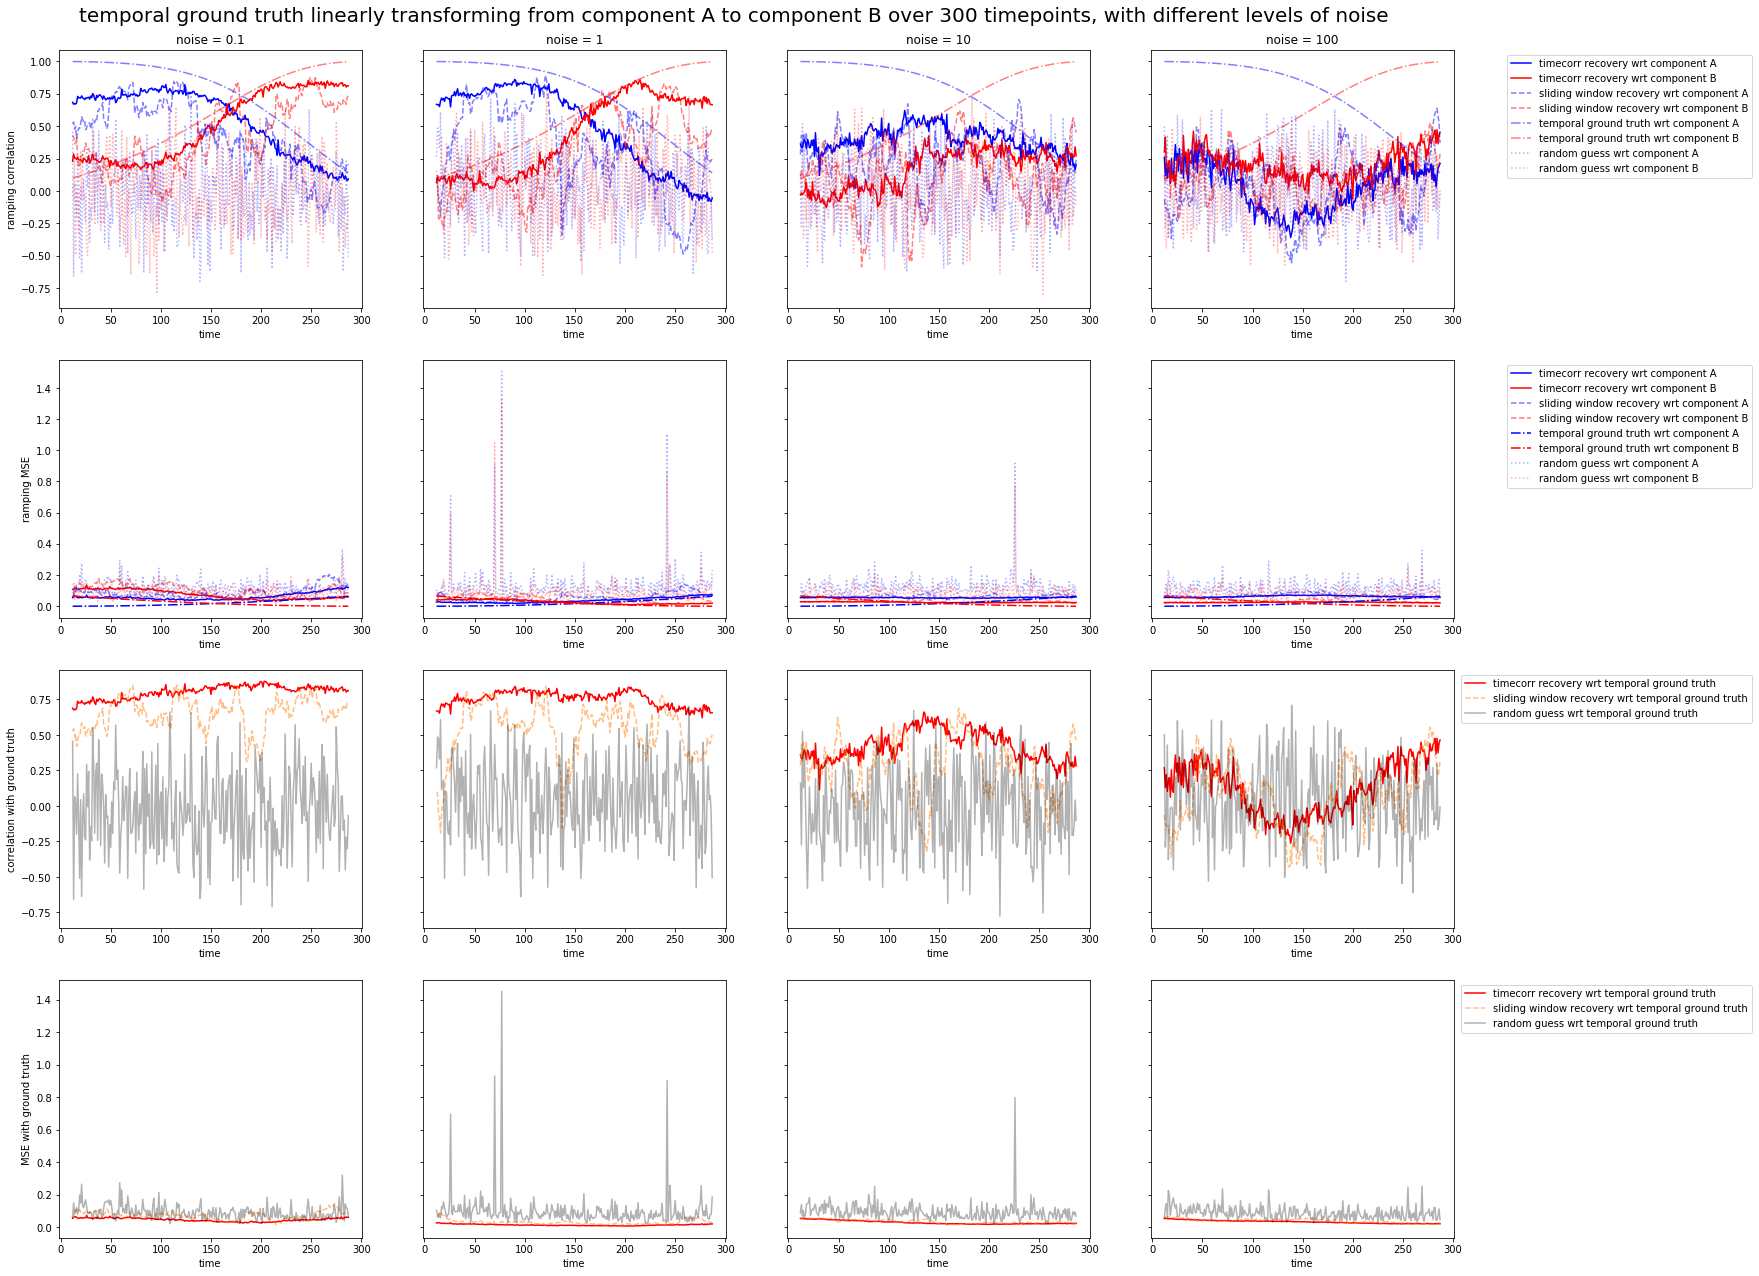

In [1]:
##### timecorr comparision with random guess, true correlations and sliding window isfc
import numpy as np
from scipy.linalg import cholesky
from scipy.spatial.distance import squareform
from scipy.stats.stats import pearsonr
import sys
import os
sys.path.append(os.path.abspath('../timecorr/'))
from _shared.helpers import isfc, sliding_window_isfc
import matplotlib.pyplot as plt
from math import log

sliding_window_length = 25
block_length = 1
covariance_num = 300
noise_level = [0.1,1,10,100]
repetitions=1
noise_num = len(noise_level)
time_range=time_len = block_length * covariance_num
activation_num = 6
subject_num = 5
variance = 1000
activations = np.random.normal(0,1,[noise_num, subject_num, activation_num, time_len])
correlations = np.zeros([covariance_num,activation_num,activation_num])
correlation1,correlation2 = np.zeros([activation_num,activation_num]), np.zeros([activation_num,activation_num])

def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

def cholesky_ramp_correlation_data():
    global activations, correlations,correlation1,correlation2
    correlations = np.zeros([covariance_num,activation_num,activation_num])
    activations_temp = np.random.normal(0,1,[activation_num, time_len])
    
    while not is_pos_def(correlation1):
        feature_map1 = np.random.normal(0,1,[activation_num,activation_num])
        correlation1 = np.dot(feature_map1,feature_map1.T)
        correlation1 = correlation1/np.max(abs(correlation1))
    while not is_pos_def(correlation2):
        feature_map2 = np.random.normal(0,1,[activation_num,activation_num])
        correlation2 = np.dot(feature_map2,feature_map2.T)
        correlation2 = correlation2/np.max(abs(correlation2))
    for i in range(time_len):
        cov_temp = (time_len-i)*0.5*(np.log(1+correlation1+1e-5) - np.log(1-correlation1+1e-5))/float(time_len)+i*0.5*(np.log(1+correlation2+1e-5) - np.log(1-correlation2+1e-5))/float(time_len)
        correlations[i] =  (np.exp(2*cov_temp) - 1)/(np.exp(2*cov_temp) + 1)
        activations_temp[:,i] = np.dot(cholesky(correlations[i]),activations_temp[:,i])
    for i in range(noise_num):
        activations[i]=np.tile(activations_temp,[subject_num,1,1] )+np.random.normal(0,noise_level[i],[subject_num, activation_num, time_len])


lower_limit, upper_limit = sliding_window_length/2, time_len-sliding_window_length/2
time_range = upper_limit - lower_limit

timecorr_correlations1,timecorr_correlations2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])
sliding_window_correlations1,sliding_window_correlations2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])
true_correlations1,true_correlations2 = np.zeros(time_len-sliding_window_length+1),np.zeros(time_len-sliding_window_length+1)
random_correlations1,random_correlations2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])

timecorr_MSE1,timecorr_MSE2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])
sliding_window_MSE1,sliding_window_MSE2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])
true_MSE1,true_MSE2 = np.zeros(time_len-sliding_window_length+1),np.zeros(time_len-sliding_window_length+1)
random_MSE1,random_MSE2 = np.zeros([noise_num,time_len-sliding_window_length+1]),np.zeros([noise_num,time_len-sliding_window_length+1])
color = ['b','r','k']

timecorr_recovery = np.zeros([noise_num,time_len,(activation_num * (activation_num-1) / 2)])
sliding_window_recovery = np.zeros([noise_num,time_len,(activation_num * (activation_num-1) / 2)])
true_recovery = np.zeros([time_len,(activation_num * (activation_num-1) / 2)])
random_guess = np.zeros([noise_num, time_len,(activation_num * (activation_num-1) / 2)])
random_correlation = np.zeros([activation_num,activation_num])

timecorr_correlations_single = np.zeros([noise_num,time_range])
sliding_window_correlations_single = np.zeros([noise_num,time_range])
random_correlations_single = np.zeros([noise_num,time_range])

timecorr_MSE_single = np.zeros([noise_num,time_range])
sliding_window_MSE_single = np.zeros([noise_num,time_range])
random_MSE_single = np.zeros([noise_num,time_range])

for i in range(repetitions):
    cholesky_ramp_correlation_data()
    for v in range(noise_num):
        timecorr_recovery[v] = isfc(activations[v],1000)
        sliding_window_recovery[v] = sliding_window_isfc(activations[v],sliding_window_length)
        for l in range(time_len):
            random_correlation = np.random.normal(0,1,[activation_num,activation_num])
            while not is_pos_def(random_correlation):
                random_feature_map = np.random.normal(0,1,[activation_num,activation_num])
                random_correlation = np.dot(random_feature_map,random_feature_map.T)
                random_correlation = random_correlation/np.max(abs(random_correlation))
            random_guess[v,l] = squareform(random_correlation,checks=False)
    for t in range(time_len):
        true_recovery[t] = squareform(correlations[t],checks=False)
    for timepoint in range(time_len-sliding_window_length+1):
        for v in range(noise_num):
            otc1 = pearsonr(timecorr_recovery[v,timepoint+sliding_window_length/2], squareform(correlation1,checks=False))[0]
            timecorr_correlations1[v,timepoint] += 0.5 * (log(1+otc1) - log(1-otc1))
            otc2 = pearsonr(timecorr_recovery[v,timepoint+sliding_window_length/2], squareform(correlation2,checks=False))[0]
            timecorr_correlations2[v,timepoint] += 0.5 * (log(1+otc2) - log(1-otc2))
            
            timecorr_MSE1[v,timepoint]+=np.mean(np.square(timecorr_recovery[v,timepoint+sliding_window_length/2]-squareform(correlation1,checks=False)))
            timecorr_MSE2[v,timepoint]+=np.mean(np.square(timecorr_recovery[v,timepoint+sliding_window_length/2]-squareform(correlation2,checks=False)))
            
            otcs = pearsonr(timecorr_recovery[v, timepoint+sliding_window_length/2], squareform(correlations[timepoint+sliding_window_length/2],checks=False))[0]
            timecorr_correlations_single[v, timepoint]+= 0.5 * (log(1+otcs) - log(1-otcs))
            
            timecorr_MSE_single[v, timepoint]+=np.mean(np.square(timecorr_recovery[v, timepoint+sliding_window_length/2]-squareform(correlations[timepoint+sliding_window_length/2],checks=False)))
        
            sc1 = pearsonr(sliding_window_recovery[v,timepoint], squareform(correlation1,checks=False))[0]
            sliding_window_correlations1[v,timepoint] += 0.5 * (log(1+sc1) - log(1-sc1))
            sc2 = pearsonr(sliding_window_recovery[v,timepoint], squareform(correlation2,checks=False))[0]
            sliding_window_correlations2[v,timepoint] += 0.5 * (log(1+sc2) - log(1-sc2))

            sliding_window_MSE1[v,timepoint]+=np.mean(np.square(sliding_window_recovery[v,timepoint]-squareform(correlation1,checks=False)))
            sliding_window_MSE2[v,timepoint]+=np.mean(np.square(sliding_window_recovery[v,timepoint]-squareform(correlation2,checks=False)))

            
            rc1 = pearsonr(random_guess[v,timepoint+sliding_window_length/2], squareform(correlation1,checks=False))[0]
            random_correlations1[v,timepoint] += 0.5 * (log(1+rc1) - log(1-rc1+1e-5))
            rc2 = pearsonr(random_guess[v,timepoint+sliding_window_length/2], squareform(correlation2,checks=False))[0]
            random_correlations2[v,timepoint] += 0.5 * (log(1+rc2) - log(1-rc2+1e-5))

            random_MSE1[v,timepoint]+=np.mean(np.square(random_guess[v,timepoint+sliding_window_length/2]-squareform(correlation1,checks=False)))
            random_MSE2[v,timepoint]+=np.mean(np.square(random_guess[v,timepoint+sliding_window_length/2]-squareform(correlation2,checks=False)))

            swc = pearsonr(sliding_window_recovery[v,timepoint], squareform(correlations[timepoint+sliding_window_length/2],checks=False))[0]
            sliding_window_correlations_single[v,timepoint] += 0.5 * (log(1+swc) - log(1-swc))

            sliding_window_MSE_single[v,timepoint]+=np.mean(np.square(sliding_window_recovery[v,timepoint]-squareform(correlations[timepoint+sliding_window_length/2],checks=False)))        

            rc = pearsonr(random_guess[v,timepoint+sliding_window_length/2], squareform(correlations[timepoint+sliding_window_length/2],checks=False))[0]
            random_correlations_single[v,timepoint] += 0.5 * (log(1+rc) - log(1-rc))

            random_MSE_single[v,timepoint]+=np.mean(np.square(random_guess[v,timepoint+sliding_window_length/2]-squareform(correlations[timepoint+sliding_window_length/2],checks=False)))        

        tc1 = pearsonr(true_recovery[timepoint+sliding_window_length/2], squareform(correlation1,checks=False))[0]
        true_correlations1[timepoint] += 0.5 * (log(1+tc1) - log(1-tc1+1e-5))
        tc2 = pearsonr(true_recovery[timepoint+sliding_window_length/2], squareform(correlation2,checks=False))[0]
        true_correlations2[timepoint] += 0.5 * (log(1+tc2) - log(1-tc2+1e-5))

        true_MSE1[timepoint]+=np.mean(np.square(true_recovery[timepoint+sliding_window_length/2]-squareform(correlation1,checks=False)))
        true_MSE2[timepoint]+=np.mean(np.square(true_recovery[timepoint+sliding_window_length/2]-squareform(correlation2,checks=False)))

timecorr_correlations1 /= repetitions
timecorr_correlations1 =  (np.exp(2*timecorr_correlations1) - 1)/(np.exp(2*timecorr_correlations1) + 1)

timecorr_correlations2 /= repetitions
timecorr_correlations2 =  (np.exp(2*timecorr_correlations2) - 1)/(np.exp(2*timecorr_correlations2) + 1)

sliding_window_correlations1 /= repetitions
sliding_window_correlations1 =  (np.exp(2*sliding_window_correlations1) - 1)/(np.exp(2*sliding_window_correlations1) + 1)

sliding_window_correlations2 /= repetitions
sliding_window_correlations2 =  (np.exp(2*sliding_window_correlations2) - 1)/(np.exp(2*sliding_window_correlations2) + 1)

true_correlations1 /= repetitions
true_correlations1 =  (np.exp(2*true_correlations1) - 1)/(np.exp(2*true_correlations1) + 1)

true_correlations2 /= repetitions
true_correlations2 =  (np.exp(2*true_correlations2) - 1)/(np.exp(2*true_correlations2) + 1)

random_correlations1 /= repetitions
random_correlations1 =  (np.exp(2*random_correlations1) - 1)/(np.exp(2*random_correlations1) + 1)

random_correlations2 /= repetitions
random_correlations2 =  (np.exp(2*random_correlations2) - 1)/(np.exp(2*random_correlations2) + 1)


timecorr_MSE1/= repetitions
timecorr_MSE2/= repetitions

sliding_window_MSE1/= repetitions
sliding_window_MSE2/= repetitions

true_MSE1/= repetitions
true_MSE2/= repetitions

random_MSE1/= repetitions
random_MSE2/= repetitions

timecorr_correlations_single /= repetitions
timecorr_correlations_single = (np.exp(2*timecorr_correlations_single) - 1)/(np.exp(2*timecorr_correlations_single) + 1) 
sliding_window_correlations_single /= repetitions
sliding_window_correlations_single =(np.exp(2*sliding_window_correlations_single) - 1)/(np.exp(2*sliding_window_correlations_single) + 1) 
random_correlations_single /= repetitions
random_correlations_single =(np.exp(2*random_correlations_single) - 1)/(np.exp(2*random_correlations_single) + 1) 

timecorr_MSE_single /= repetitions
sliding_window_MSE_single /= repetitions
random_MSE_single /= repetitions


f, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4,4, sharey='row', figsize=(25,20))
a1,a2,a3,a4 = [ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8],[ax9,ax10,ax11,ax12],[ax13,ax14,ax15,ax16]
plt.subplots_adjust(top=0.95)
plt.suptitle("temporal ground truth linearly transforming from component A to component B over 300 timepoints, with different levels of noise",fontsize=20)
a1[0].set_title("noise = 0.1")
a1[1].set_title("noise = 1")
a1[2].set_title("noise = 10")
a1[3].set_title("noise = 100")
a1[0].set_ylabel("ramping correlation")
a2[0].set_ylabel("ramping MSE")
a3[0].set_ylabel("correlation with ground truth")
a4[0].set_ylabel("MSE with ground truth")
for v in range(noise_num): 
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),timecorr_correlations1[v],c=color[0],linestyle='-',alpha=1.0, label = "timecorr recovery wrt component A")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),timecorr_correlations2[v],c=color[1],linestyle='-',alpha=1.0,label = "timecorr recovery wrt component B")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),sliding_window_correlations1[v],c=color[0],linestyle='--',alpha=0.5,label = "sliding window recovery wrt component A")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),sliding_window_correlations2[v],c=color[1],linestyle='--',alpha=0.5,label = "sliding window recovery wrt component B")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),true_correlations1,c=color[0],linestyle='-.',alpha=0.5,label = "temporal ground truth wrt component A")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),true_correlations2,c=color[1],linestyle='-.',alpha=0.5,label = "temporal ground truth wrt component B")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),random_correlations1[v],c=color[0],linestyle=':',alpha=0.3,label = "random guess wrt component A")
    a1[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),random_correlations2[v],c=color[1],linestyle=':',alpha=0.3,label = "random guess wrt component B")
    a1[v].set_xlabel("time")
    if v==noise_num-1:
        a1[v].legend(bbox_to_anchor=(2, 1), loc=1)
        
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),timecorr_MSE1[v],c=color[0],linestyle='-',alpha=1.0, label = "timecorr recovery wrt component A")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),timecorr_MSE2[v],c=color[1],linestyle='-',alpha=1.0,label = "timecorr recovery wrt component B")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),sliding_window_MSE1[v],c=color[0],linestyle='--',alpha=0.5,label = "sliding window recovery wrt component A")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),sliding_window_MSE2[v],c=color[1],linestyle='--',alpha=0.5,label = "sliding window recovery wrt component B")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),true_MSE1,c=color[0],linestyle='-.',alpha=1,label = "temporal ground truth wrt component A")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),true_MSE2,c=color[1],linestyle='-.',alpha=1,label = "temporal ground truth wrt component B")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),random_MSE1[v],c=color[0],linestyle=':',alpha=0.3,label = "random guess wrt component A")
    a2[v].plot(range(sliding_window_length/2,time_len-sliding_window_length/2),random_MSE2[v],c=color[1],linestyle=':',alpha=0.3,label = "random guess wrt component B")
    a2[v].set_xlabel("time")
    if v==noise_num-1:
        a2[v].legend(bbox_to_anchor=(2, 1), loc=1)
        
    a3[v].plot(range(lower_limit,upper_limit),timecorr_correlations_single[v],c='r',alpha=1,linestyle='-', label = "timecorr recovery wrt temporal ground truth")
    a3[v].plot(range(lower_limit,upper_limit),sliding_window_correlations_single[v],c='C1',alpha=0.5,linestyle='--', label = "sliding window recovery wrt temporal ground truth")
    a3[v].plot(range(lower_limit,upper_limit),random_correlations_single[v],c='k',alpha=0.3,linestyle='-', label = "random guess wrt temporal ground truth")
    a3[v].set_xlabel("time")
    if v==noise_num-1:
        a3[v].legend(bbox_to_anchor=(2, 1), loc=1)
    
    a4[v].plot(range(lower_limit,upper_limit),timecorr_MSE_single[v],c='r',alpha=1,linestyle='-', label = "timecorr recovery wrt temporal ground truth")
    a4[v].plot(range(lower_limit,upper_limit),sliding_window_MSE_single[v],c='C1',alpha=0.5,linestyle='--', label = "sliding window recovery wrt temporal ground truth")
    a4[v].plot(range(lower_limit,upper_limit),random_MSE_single[v],c='k',alpha=0.3,linestyle='-', label = "random guess wrt temporal ground truth")
    a4[v].set_xlabel("time")
    if v==noise_num-1:
        a4[v].legend(bbox_to_anchor=(2, 1), loc=1)
    
plt.show()